# CSS324 Homework Assignment 2

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

## Group Members
1. Member 1 : Featthima Bou
2. Member 2 : Jaya Shree Hada

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load CIFAR10 dataset
(x, y), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y, y_test = y.flatten(), y_test.flatten()
x = x / 255
x_test = x_test / 255

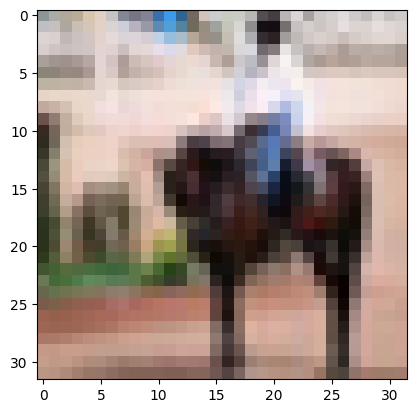

Class= 7


In [6]:
# Plot a training example
plt.imshow(x[11, :, :, :])
plt.show()
print(f"Class= {y[11]}")        # 7 = horse

In [7]:
# Split the training set
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=11)
X_test = x_test

print("Shape of the datasets")
print("Training set   =", X_train.shape, y_train.shape)
print("Validation set =", X_valid.shape, y_valid.shape)
print("Test set       =", X_test.shape, y_test.shape)

Shape of the datasets
Training set   = (40000, 32, 32, 3) (40000,)
Validation set = (10000, 32, 32, 3) (10000,)
Test set       = (10000, 32, 32, 3) (10000,)


In [8]:
# Use one-hot encoding for y
Y_train = tf.one_hot(y_train, 10)
Y_valid = tf.one_hot(y_valid, 10)
Y_test = tf.one_hot(y_test, 10)

## Task

Construct a deep neural network to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes, appropriate activation functions, regularizers, or the structure of the network. 

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

**Contraints**
 - The number of weight layers must be less than or equal to 6.
 - The number of training epochs must be set to 50.
 - Your model must achieve the test accuracy of at least 60%.

**Rules**
 - This is a group work. Each group can compose of up to three members.

In [9]:
# Your implementation for Question 1
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

hist1 = model.fit(X_train, Y_train, batch_size=4096, validation_data=(X_valid, Y_valid), epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

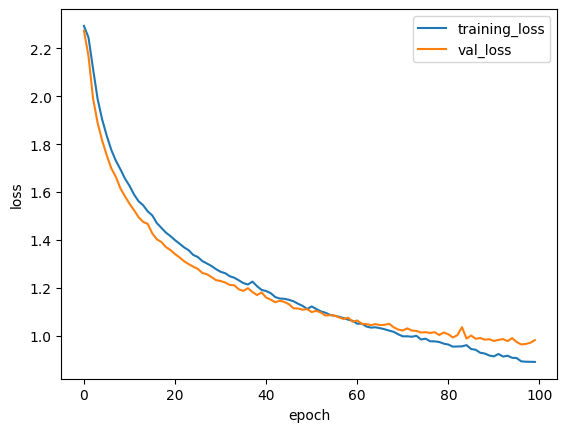

In [10]:
# Plot the training loss and validation loss
N = len(hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['loss'])
plt.plot(np.arange(N), hist1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'val_loss'], loc='upper right')
plt.show()

In [11]:
res = model.evaluate(X_train, Y_train, verbose=0, batch_size=2048)
print(f"Training accuracy   = {res[1]:.4f}")
res = model.evaluate(X_valid, Y_valid, verbose=0, batch_size=2048)
print(f"Validation accuracy = {res[1]:.4f}")
res = model.evaluate(X_test, Y_test, verbose=0, batch_size=2048)
print(f"Test accuracy       = {res[1]:.4f}")

Training accuracy   = 0.7178
Validation accuracy = 0.6507
Test accuracy       = 0.6608


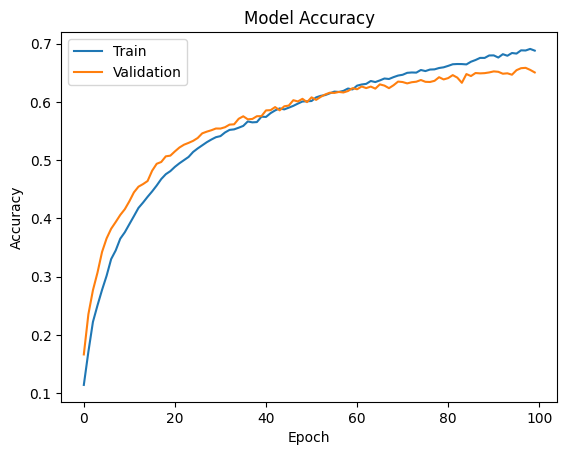

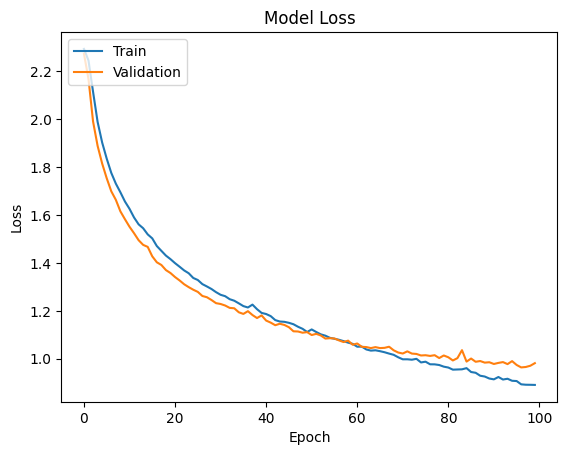

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()